In [21]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [150]:
df = pd.read_csv('mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 1. Simple, basic scatter plot of displ vs. hwy

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


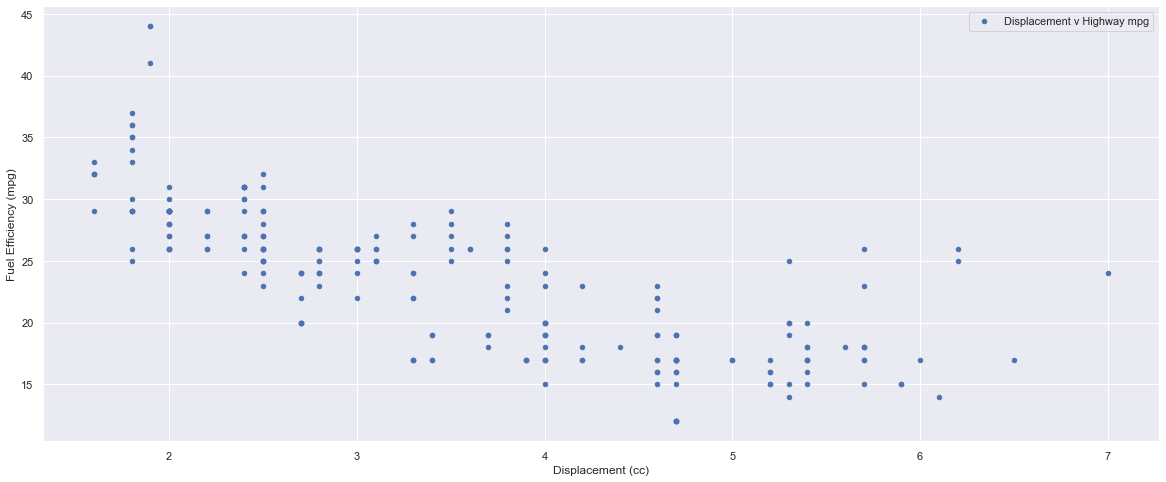

In [23]:
ax = df.plot.scatter(x='displ', y='hwy', label='Displacement v Highway mpg',figsize=(20,8))
ax.xaxis.label.set_text('Displacement (cc)')
ax.yaxis.label.set_text('Fuel Efficiency (mpg)')


Same as above, but additionally mapping each automobile class (‘class’) to:

### 2. a different shape/symbol

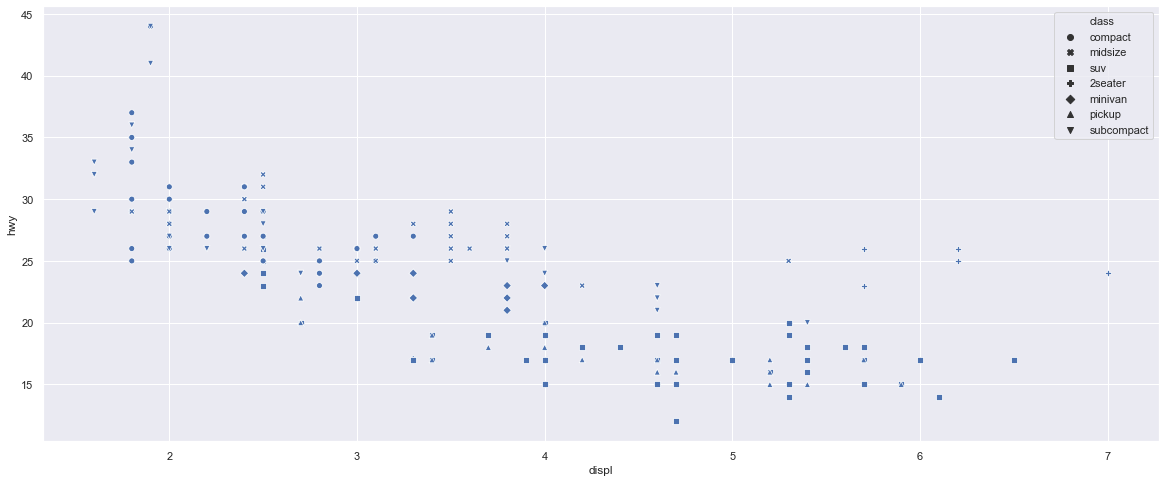

In [25]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='displ', y='hwy', style='class',data=df)

### 3. a different color

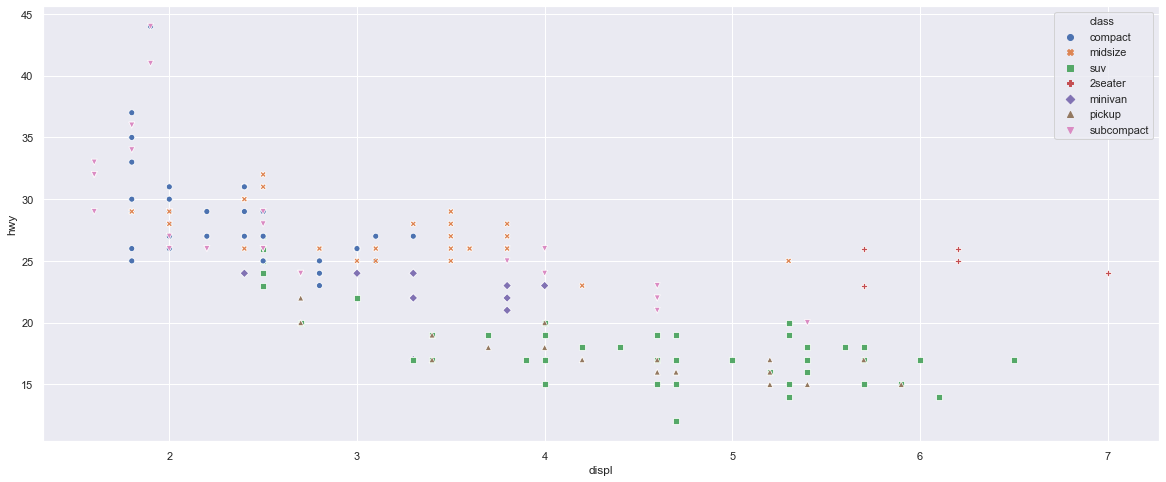

In [26]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='displ', y='hwy', style='class',data=df,hue='class')

### 4. a color or brightness and shape/symbol

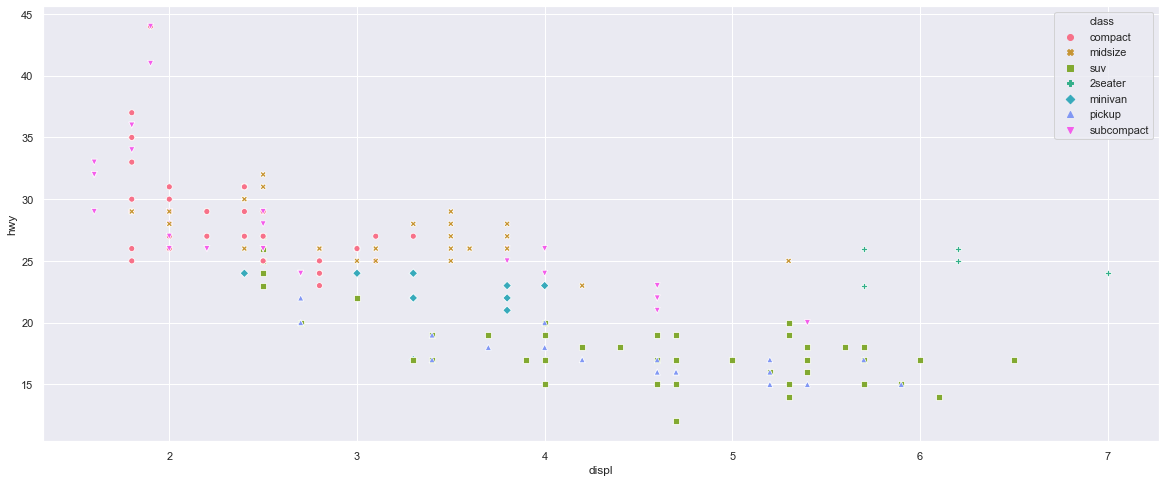

In [43]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='displ', y='hwy', style='class',data=df,hue='class',palette='husl')

### 5. a brightness - determined by mean displacement for the class

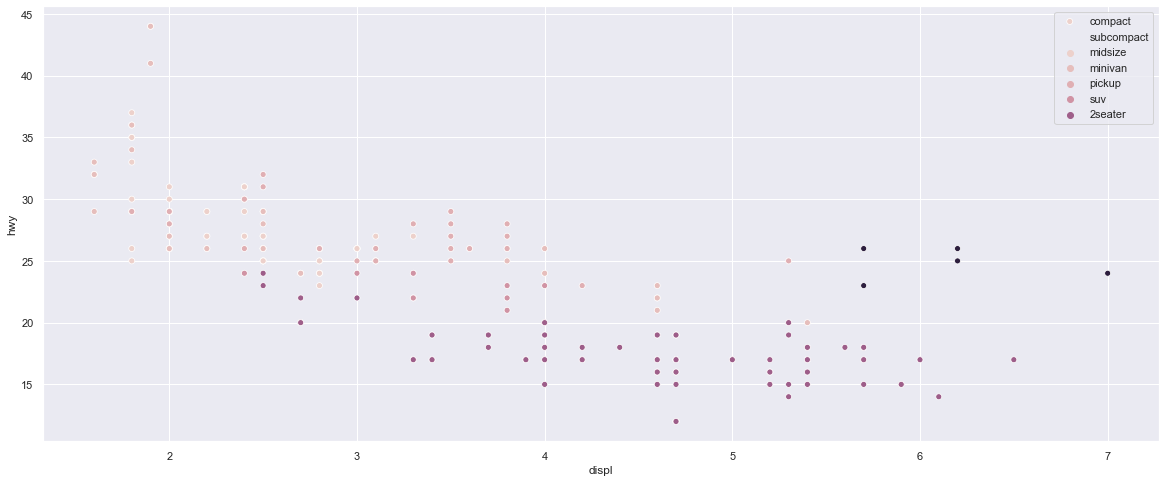

In [107]:
tdf = df
label=tdf.groupby('class').transform(np.mean)['displ']

plt.figure(figsize=(20,8))
a = sns.scatterplot(x='displ', y='hwy',data=tdf,hue=label,legend='full')

#label2=tdf.groupby('class').mean()['displ']
#label2 = pd.DataFrame(label2)
#label2 = label2.sort_values(by =['displ'])
a.legend(['compact','subcompact','midsize','minivan','pickup','suv','2seater'])

### 6. a shape whose size is determined by mean displacement for the class

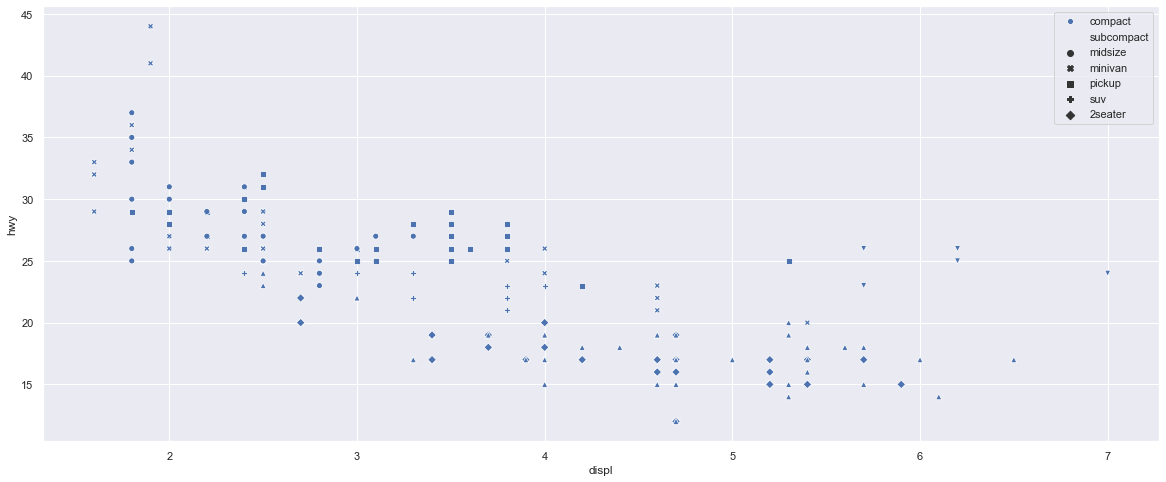

In [117]:
tdf = df
label=tdf.groupby('class').transform(np.mean)['displ']

plt.figure(figsize=(20,8))
a = sns.scatterplot(x='displ', y='hwy',data=tdf,legend='full',style=label,palette='bright')
a.legend(['compact','subcompact','midsize','minivan','pickup','suv','2seater'])

### Question: How can you control the brightness of a mark?)

### 1) Were 2008 models more or less fuel efficient than 1999?

In [137]:
subsetDataFrame = df[df['year'].isin(['1999', '2008']) ]

In [141]:
subsetDataFrame.groupby('year').mean()['cty']

year
1999    17.017094
2008    16.700855
Name: cty, dtype: float64

In [142]:
subsetDataFrame.groupby('year').mean()['hwy']

year
1999    23.427350
2008    23.452991
Name: hwy, dtype: float64

There is essentially no difference between 1999 models and 2008 models when looking at the means.

### 2) plot cty vs. hwy with year mapped to color

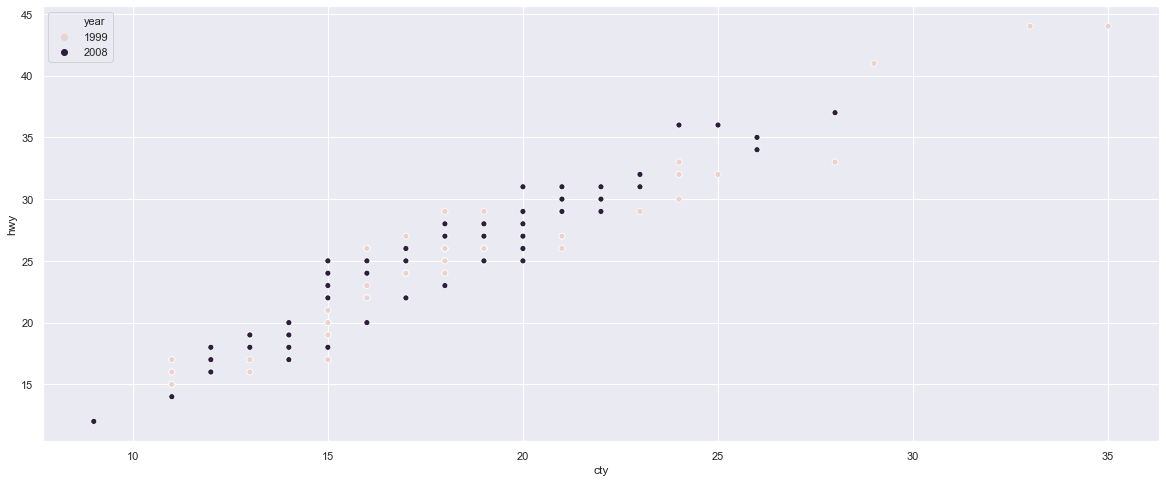

In [148]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='cty', y='hwy',data=subsetDataFrame,hue='year',legend='full')

### 3) plot year vs. cty and year vs. hwy

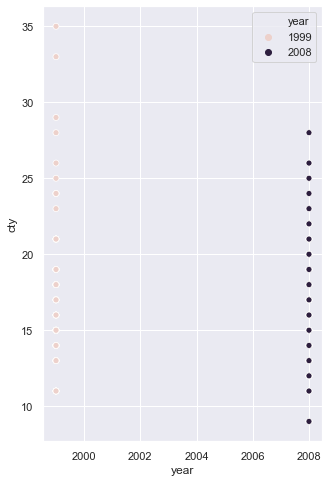

In [158]:
plt.figure(figsize=(5,8))
sns.scatterplot(x='year', y='cty',data=df,hue='year',legend='full')

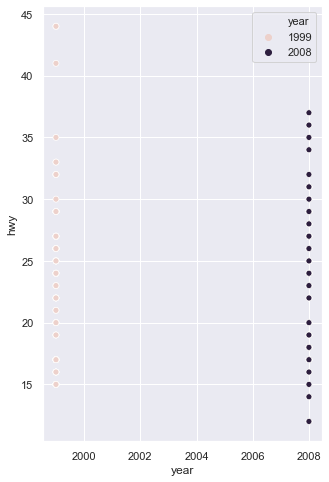

In [157]:
plt.figure(figsize=(5,8))
sns.scatterplot(x='year', y='hwy',data=df,hue='year',legend='full')

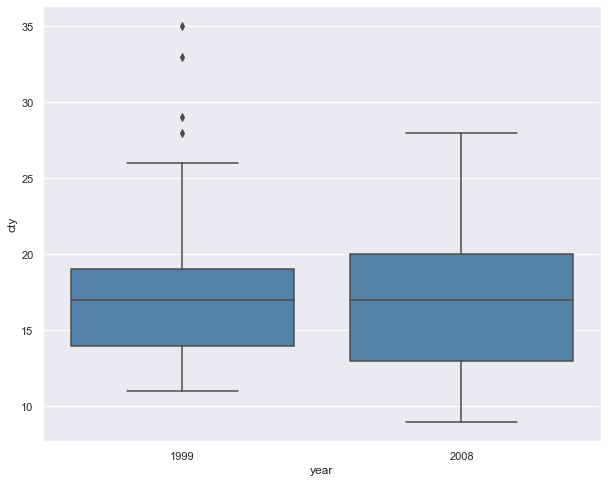

In [155]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, color='steelblue',x='year',y='cty');

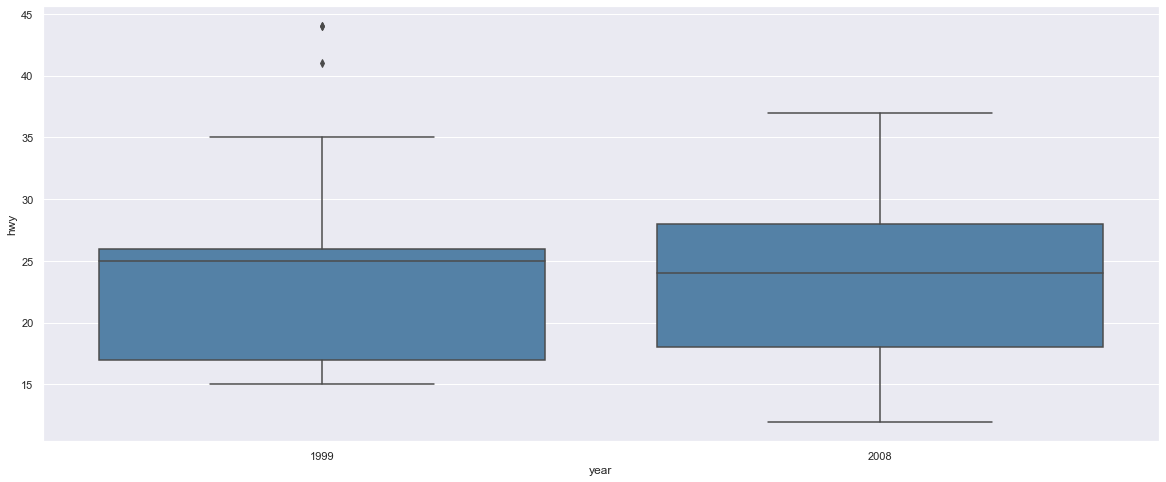

In [159]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, color='steelblue',x='year',y='hwy');

After looking at the boxplots, we can see that the median is the same for both years for city mpg, but the range of values is generally tighter for 1999 data as evidenced by shorter whiskers. Furthermore, the minimum sample values for 1999 cars start at much higher than the 2008 cars, which suggests that even the 'worst' cars in 1999, still had much better mileage than the 'worst cars' in 2008. Lastly, there are more outliers for 1999 data, for cars that had particularly high mileage, which in this context, is a good thing.

### 4)Which are easier to read?

From the scatterplots, it was easier to compare year versus just one variable e.g. hwy or cty. However, i think boxplots are the most informative for this question since you can get the best visual representation of the distributions.

# Faceting

### 1. Create multiple plots, facetted by class. In each, scatterplot displacement vs. hwy

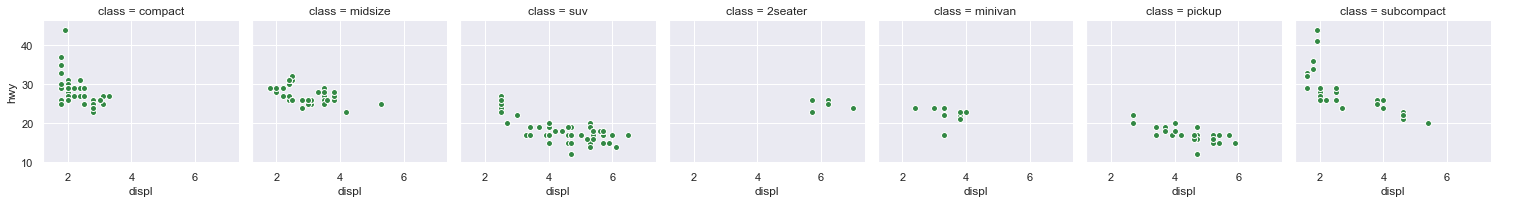

In [200]:
g = sns.FacetGrid(df, col="class")
g.map(plt.scatter, "displ","hwy",color="#338844", edgecolor="white")
g.add_legend();

### 2. Same as 1, with facets sorted by mean displacement

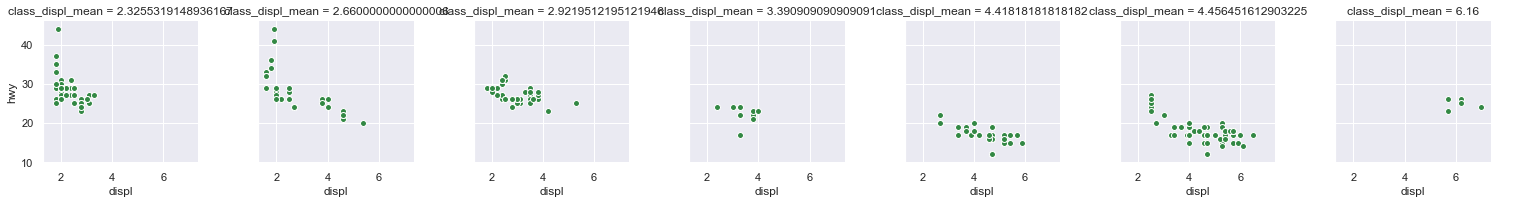

In [201]:
tdf2 = df
label=tdf2.groupby('class').transform(np.mean)['displ']
tdf2['class_displ_mean'] = pd.DataFrame(label)
tdf2

g = sns.FacetGrid(tdf2, col='class_displ_mean')
g.map(plt.scatter, "displ","hwy",color="#338844", edgecolor="white")
g.add_legend();

In [202]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,class_displ_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.325532
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.325532
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.325532
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.325532
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.325532
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,2.921951
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,2.921951
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,2.921951
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,2.921951


### 3. Same as 2, but distinguish transmission type (auto/manual) using color and draw regression per transmission type

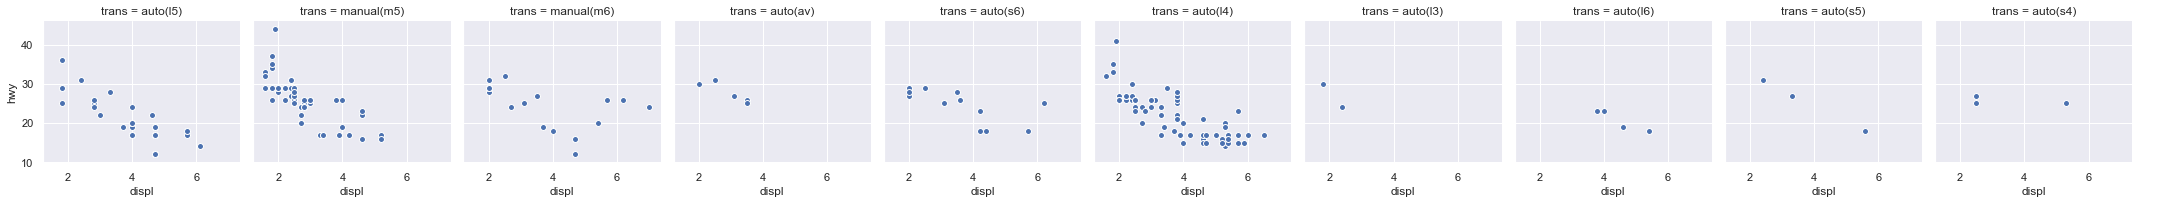

In [211]:
col_ls = {'color': ["#0000FF", "#00FF00", "#FF0066","#0000FF", "#00FF00", 
                    "#FF0066","#00FF00", "#FF0066","#00FF00", "#FF0066"]}

g = sns.FacetGrid(tdf2, col='trans',palette='Set1')
g.map(plt.scatter, "displ","hwy", edgecolor="white")
g.add_legend();

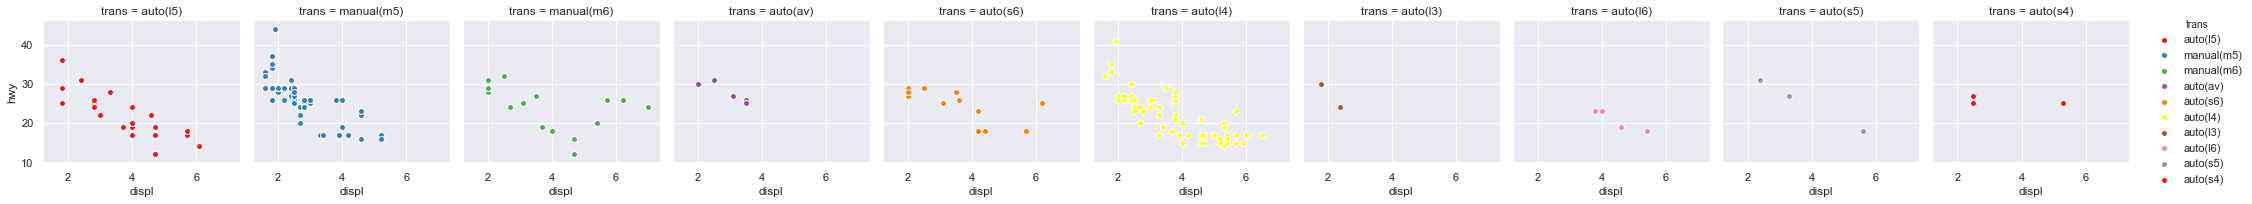